GÖZETİMSİZ ÖĞRENME

Makine öğrenmesi modellerinde bağımlı değişkenin elimizde olmadığı durumlarda gözlem birimlerinin bir şekilde anlamlı hale getirilme çabasıdır.

K-MEANS

K-means, kümeleme (clustering) için kullanılan bir makine öğrenimi algoritmasıdır. K-means algoritması, verileri önceden belirlenen bir sayıda kümeye (cluster) bölmek için kullanılır. Bu algoritma, her bir veri noktasını, küme merkezlerine olan uzaklıklarını minimize ederek kümeler halinde düzenler.

In [33]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
# "USArrests" verisetini yüklüyoruz.
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
# df içerisinde index'i ayarlıyoruz.
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [36]:
# Veriseti içinde eksik değer olup olmadığını inceliyoruz.
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [37]:
# Verisetindeki sayısal sütunlar için istatistiksel özet bilgilerini inceliyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [38]:
from sklearn.cluster import KMeans

In [39]:
# Modeli oluşturduk ve eğittik.
model = KMeans(n_clusters = 3)
k_fit = model.fit(df)

In [40]:
# Modeldeki küme sayısını gözlemliyoruz.
k_fit.n_clusters

3

In [41]:
# Modeldeki her bir gözlemin hangi sınıf etiketine sahip olduğunu gözlemliyoruz.
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [42]:
# Modeldeki sınıf etiketlerini "kumeler" degiskenine atıyoruz.
kumeler = k_fit.labels_

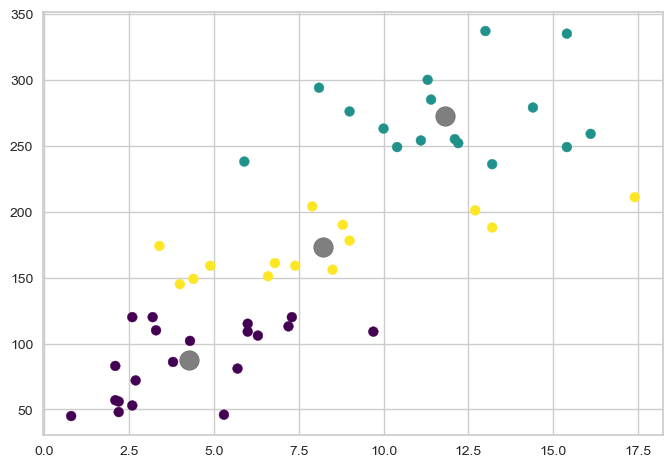

In [43]:
# Modeli Görselleştiriyoruz.

plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [44]:
# Gözlem birimlerinin hangi kümeye ait olduğunu gözlemliyoruz.
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [45]:
# Küme numaralarını df içine ekliyoruz.
df["kume_no"] = kumeler
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


Model Tuning (Optimum Küme Sayısının Belirlenmesi)

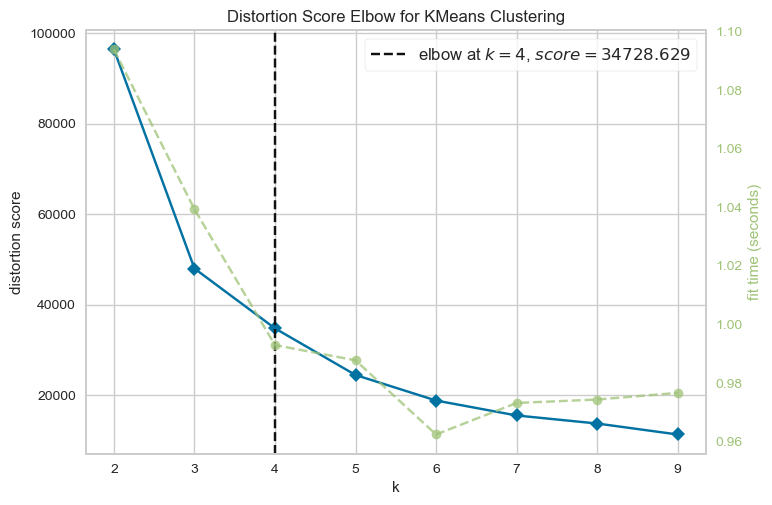

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Optimum küme sayısını belirliyoruz.
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df) 
visualizer.poof()  

In [47]:
# Grafik yorumlanarak küme sayısı "4" olarak belirlendi.

In [48]:
# Kmeans nesnesini oluşturduk ve ve modeli eğittik.
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)

In [49]:
# Yeni modeldeki her bir gözlemin hangi sınıf etiketine sahip olduğunu gözlemliyoruz.
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [50]:
# Modeldeki sınıf etiketlerini "kumeler" degiskenine atıyoruz.
kumeler = k_fit.labels_

In [51]:
# Gözlem birimlerinin hangi kümeye ait olduğunu gözlemliyoruz.
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,3


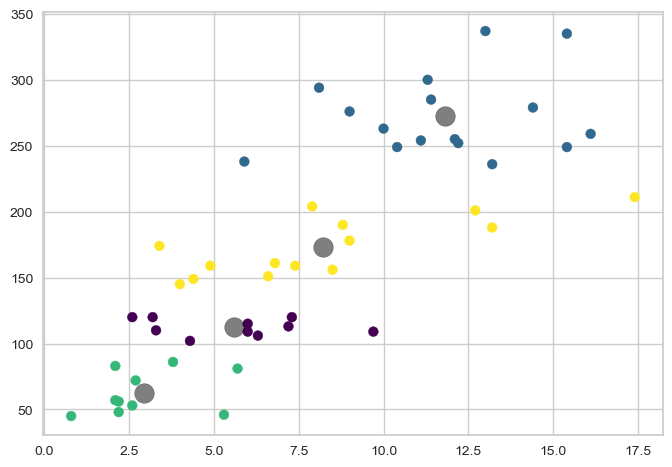

In [52]:
# Yeni Modeli Görselleştiriyoruz.
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);